In [1]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import skfuzzy as fuzz
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
#Usar RandomizedSearchCV
from scipy.stats import uniform
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import make_scorer, silhouette_score
from sklearn.cluster import HDBSCAN
from sklearn.cluster import MeanShift, estimate_bandwidth

In [2]:
# # modelo en español de spaCy
# !python -m spacy download es_core_news_sm

In [3]:
type_standar = "minmax"
# type_standar = "zscore"

In [4]:
# Cargar los datos
# file_path = 'data/embeddings/df_tfidf_' + type_standar + '.csv'
file_path = 'data/embeddingstrain/df_embeddings_' + type_standar + '.csv'
df_embeddings = pd.read_csv(file_path, delimiter=',')

In [5]:
df_embeddings.head()

,embed_0,embed_1,embed_2,embed_3,embed_4,embed_5,embed_6,embed_7,embed_8,embed_9,...,embed_378,embed_379,embed_380,embed_381,embed_382,embed_383,ANIO,VOLUMEN,CUARTIL,PAGINAS
0,-0.229880,0.249529,0.081523,0.202636,-0.193608,-0.030638,0.188579,-0.098298,-0.218437,-0.088780,...,-0.042838,-0.232117,-0.262647,0.127149,-0.106181,-0.089396,1.000000,0.000009,0.00,0.113402
1,-0.012822,0.149340,0.024315,-0.009801,0.088035,-0.033907,0.111280,-0.171367,-0.193791,0.289990,...,0.178573,-0.004228,-0.047453,-0.051901,0.115226,0.034473,1.000000,0.000010,0.25,0.164948
2,-0.055708,0.190835,-0.065515,0.225034,0.369172,0.113739,0.287937,-0.156514,-0.296518,0.024632,...,0.300612,-0.066641,-0.076587,-0.150014,0.088423,-0.016509,1.000000,0.000006,0.25,0.154639
3,0.137942,0.176798,-0.032310,0.311785,0.261316,0.186766,0.018803,-0.187183,-0.103112,0.044219,...,0.363133,0.012749,-0.090156,-0.091900,-0.104825,0.144255,0.888889,0.000010,0.25,0.185567
4,-0.118311,-0.016865,0.039658,0.219906,-0.250331,0.054814,-0.052862,0.115424,-0.129113,-0.247627,...,-0.027158,-0.341358,-0.035781,0.166203,-0.286782,0.024610,1.000000,0.000810,0.75,0.082474


In [6]:
data_reduce = pd.read_csv("data/embeddingstrain/reduce.csv", delimiter=',')

In [7]:
data_reduce.head()

,X_pca_2d_1,X_pca_2d_2,X_pca_3d_1,X_pca_3d_2,X_pca_3d_3,tsne_result_1,tsne_result_2,data_mds_1,data_mds_2,data_isomap_1,data_isomap_2
0,-0.394077,0.063113,-0.394077,0.063113,0.251726,-1.939579,-17.337658,-1.019385,2.368571,5.890600,-3.903852
1,0.527097,1.089638,0.527097,1.089638,0.408916,10.616753,16.925472,2.800187,0.015151,-1.481175,-5.822447
2,0.319094,1.100580,0.319094,1.100580,0.377761,9.219580,15.009484,-3.189933,0.784980,-3.317806,-6.674443
3,0.291322,0.445351,0.291322,0.445351,0.295924,9.902867,14.434706,-2.406429,0.292794,-2.472199,-4.505318
4,-0.640456,0.339833,-0.640456,0.339833,1.105263,0.581208,-19.201382,-2.095233,2.979929,2.392982,-2.905791


### 

## Entrenamiento

In [8]:
# allDataScaleOnlyNonBinary = df_tfidf.copy()
scaledNonBinaryVariables = df_embeddings.copy()

### K-means

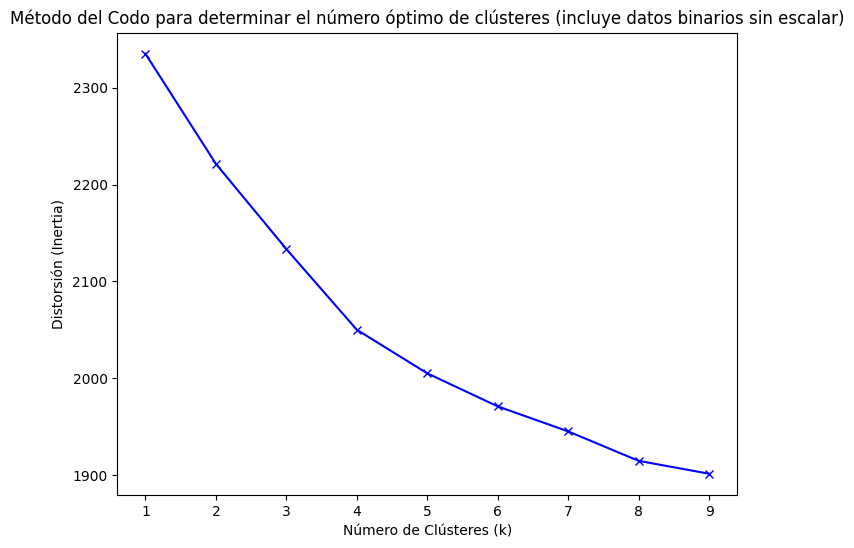

In [9]:
# Método del codo para seleccionar el número óptimo de clústeres incluyendo los datos binarios
distortions = []
K = range(1, 10)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=50)
    kmeans.fit(scaledNonBinaryVariables)
    distortions.append(kmeans.inertia_)

# Graficar el método del codo
plt.figure(figsize=(8,6))
plt.plot(K, distortions, 'bx-')
plt.xlabel('Número de Clústeres (k)')
plt.ylabel('Distorsión (Inertia)')
plt.title('Método del Codo para determinar el número óptimo de clústeres (incluye datos binarios sin escalar)')
plt.show()

#### Lloyd's k-Means (clásico k-means de sklearn)

In [10]:
# Definir el número de clústeres (k)
k = 2

# Crear el modelo K-Means
kmeans = KMeans(n_clusters=k, random_state=42, init="k-means++")

# Entrenar el modelo con los datos escalados 
kmeans.fit(scaledNonBinaryVariables)

# Agregar los clústeres asignados como una nueva columna al DataFrame original
scaledNonBinaryVariables['Cluster'] = kmeans.labels_

# Visualizar los primeros resultados con la columna de clústeres
print(scaledNonBinaryVariables[['Cluster']].head())


   Cluster
0        1
1        1
2        1
3        1
4        1


In [11]:
scaledNonBinaryVariables.head()

,embed_0,embed_1,embed_2,embed_3,embed_4,embed_5,embed_6,embed_7,embed_8,embed_9,...,embed_379,embed_380,embed_381,embed_382,embed_383,ANIO,VOLUMEN,CUARTIL,PAGINAS,Cluster
0,-0.229880,0.249529,0.081523,0.202636,-0.193608,-0.030638,0.188579,-0.098298,-0.218437,-0.088780,...,-0.232117,-0.262647,0.127149,-0.106181,-0.089396,1.000000,0.000009,0.00,0.113402,1
1,-0.012822,0.149340,0.024315,-0.009801,0.088035,-0.033907,0.111280,-0.171367,-0.193791,0.289990,...,-0.004228,-0.047453,-0.051901,0.115226,0.034473,1.000000,0.000010,0.25,0.164948,1
2,-0.055708,0.190835,-0.065515,0.225034,0.369172,0.113739,0.287937,-0.156514,-0.296518,0.024632,...,-0.066641,-0.076587,-0.150014,0.088423,-0.016509,1.000000,0.000006,0.25,0.154639,1
3,0.137942,0.176798,-0.032310,0.311785,0.261316,0.186766,0.018803,-0.187183,-0.103112,0.044219,...,0.012749,-0.090156,-0.091900,-0.104825,0.144255,0.888889,0.000010,0.25,0.185567,1
4,-0.118311,-0.016865,0.039658,0.219906,-0.250331,0.054814,-0.052862,0.115424,-0.129113,-0.247627,...,-0.341358,-0.035781,0.166203,-0.286782,0.024610,1.000000,0.000810,0.75,0.082474,1


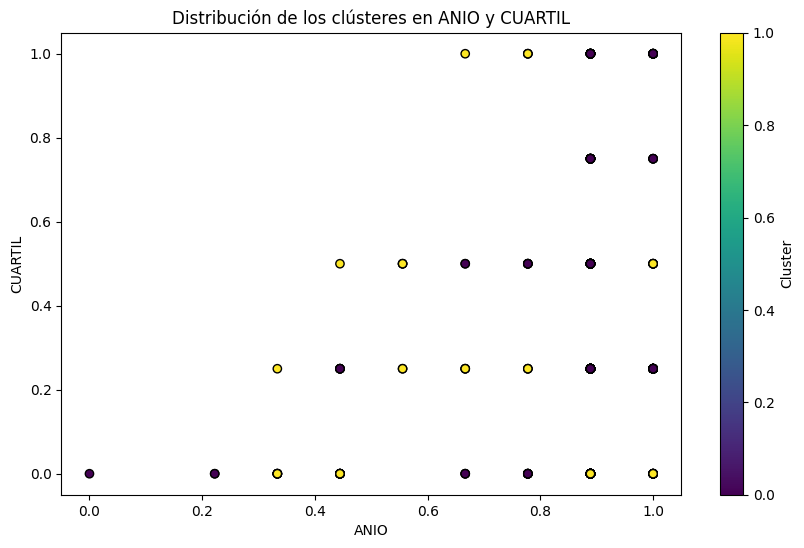

In [12]:
x_var = 'ANIO'
y_var = 'CUARTIL'

# Crear el gráfico de dispersión con los clústeres
plt.figure(figsize=(10, 6))
plt.scatter(scaledNonBinaryVariables[x_var], scaledNonBinaryVariables[y_var], c=scaledNonBinaryVariables['Cluster'], cmap='viridis', marker='o', edgecolor='k')

# Añadir etiquetas y título
plt.xlabel(x_var)
plt.ylabel(y_var)
plt.title(f'Distribución de los clústeres en {x_var} y {y_var}')
plt.colorbar(label='Cluster')

# Mostrar el gráfico
plt.show()

C:\Users\saraujo\AppData\Local\Temp\ipykernel_16584\1526112184.py:6: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(centroids[:, 0], centroids[:, 1], marker="x" , cmap='red', s=200)


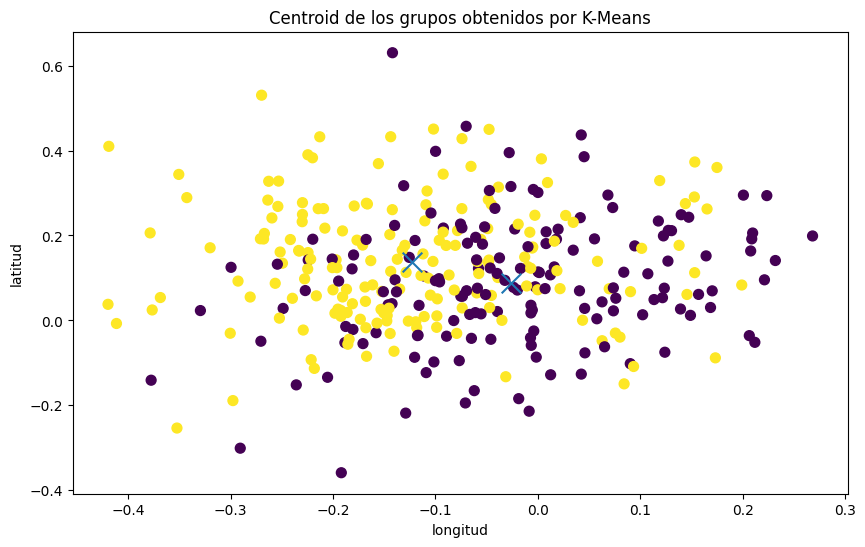

In [13]:
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

plt.figure(figsize=(10, 6))
plt.scatter(scaledNonBinaryVariables.iloc[:, 0], scaledNonBinaryVariables.iloc[:, 1], c=scaledNonBinaryVariables['Cluster'], cmap='viridis', s=50)
plt.scatter(centroids[:, 0], centroids[:, 1], marker="x" , cmap='red', s=200)

# Añadir etiquetas y título
plt.xlabel("longitud")
plt.ylabel("latitud")
plt.title(f'Centroid de los grupos obtenidos por K-Means')

# Mostrar el gráfico
plt.show()

### MacQueen’s k-Means
El algoritmo de MacQueen es una variante del k-means que actualiza los centroides después de cada asignación en lugar de hacer todas las asignaciones primero y luego actualiza los centroides. Aunque sklearn no lo incluye de manera nativa, puedes simular el comportamiento modificando un poco el algoritmo clásico.

In [14]:
import numpy as np

# MacQueen's k-means
def macqueen_kmeans(df, n_clusters, max_iter=100):
    # Convertir el DataFrame a un array de numpy
    data = df.to_numpy()
    
    # Inicializar centroides aleatoriamente
    np.random.seed(42)  # Fijar una semilla para reproducibilidad
    centroids = data[np.random.choice(data.shape[0], n_clusters, replace=False)]
    
    for _ in range(max_iter):
        for i in range(data.shape[0]):
            # Calcular distancias entre el punto y los centroides
            distances = np.linalg.norm(data[i] - centroids, axis=1)
            # Encontrar el centroide más cercano
            closest = np.argmin(distances)
            # Actualizar el centroide más cercano
            centroids[closest] = centroids[closest] + 0.1 * (data[i] - centroids[closest])
    
    # Asignar puntos al centroide más cercano
    labels = np.array([np.argmin(np.linalg.norm(data[i] - centroids, axis=1)) for i in range(data.shape[0])])
    
    return labels, centroids

# Ejecutar el algoritmo MacQueen k-means
labels, centroids = macqueen_kmeans(scaledNonBinaryVariables, n_clusters=2)
print(labels)
print(centroids)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[[-1.92302004e-01  9.68715828e-03  2.02905387e-02  3.14701647e-02
  -6.47586063e-02 -1.50923029e-01 -2.33333901e-01  1.19898126e-01
  -1.02670789e-01 -6.34369254e-02 -2.78575309e-02  7.68759996e-02
  -5.74630387e-02 -4.14594375e-02 -6.19798042e-02 -2.46453732e-01
  -1.46133274e-01  3.52662176e-01  1.66827254e-02  3.8546735

In [15]:
scaledNonBinaryVariables['cluster_MacQueen'] = labels

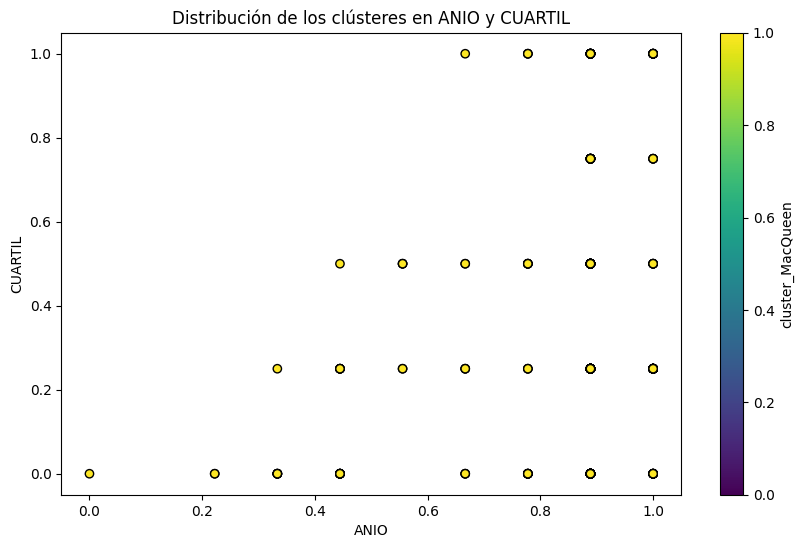

In [16]:
x_var = 'ANIO'
y_var = 'CUARTIL'

# Crear el gráfico de dispersión con los clústeres
plt.figure(figsize=(10, 6))
plt.scatter(scaledNonBinaryVariables[x_var], scaledNonBinaryVariables[y_var], c=scaledNonBinaryVariables['cluster_MacQueen'], cmap='viridis', marker='o', edgecolor='k')

# Añadir etiquetas y título
plt.xlabel(x_var)
plt.ylabel(y_var)
plt.title(f'Distribución de los clústeres en {x_var} y {y_var}')
plt.colorbar(label='cluster_MacQueen')

# Mostrar el gráfico
plt.show()

### Elkan’s k-Means
El algoritmo de Elkan usa triangulaciones para reducir el número de cálculos de distancia y hacer el k-means más eficiente. sklearn tiene este algoritmo.

In [17]:
def elkan_kmeans(df, n_clusters):
    kmeans = KMeans(n_clusters=n_clusters, init='k-means++', algorithm='elkan')
    kmeans.fit(df)
    return kmeans.labels_, kmeans.cluster_centers_

labels_elkans, centroids = elkan_kmeans(scaledNonBinaryVariables, n_clusters=2)

In [18]:
scaledNonBinaryVariables['cluster_Elkans'] = labels_elkans

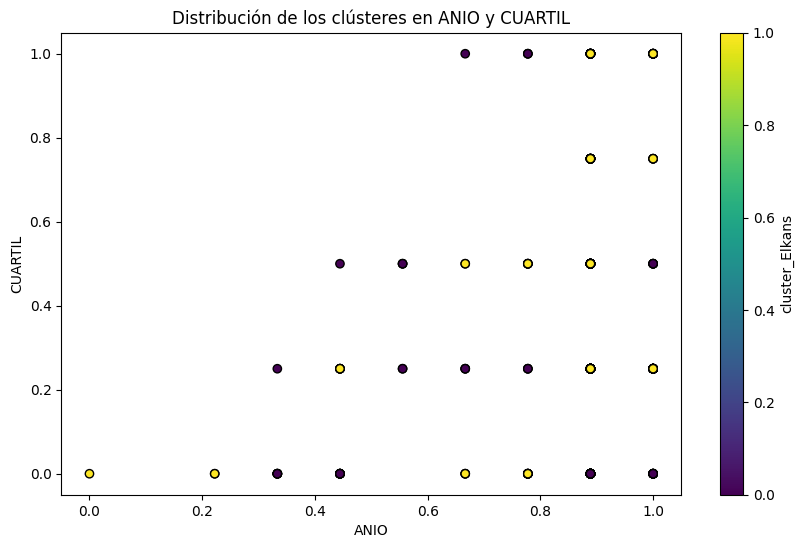

In [19]:
x_var = 'ANIO'
y_var = 'CUARTIL'

# Crear el gráfico de dispersión con los clústeres
plt.figure(figsize=(10, 6))
plt.scatter(scaledNonBinaryVariables[x_var], scaledNonBinaryVariables[y_var], c=scaledNonBinaryVariables['cluster_Elkans'], cmap='viridis', marker='o', edgecolor='k')

# Añadir etiquetas y título
plt.xlabel(x_var)
plt.ylabel(y_var)
plt.title(f'Distribución de los clústeres en {x_var} y {y_var}')
plt.colorbar(label='cluster_Elkans')

# Mostrar el gráfico
plt.show()

### Soft k-Means (Fuzzy k-Means)
Este algoritmo difiere de k-means estándar porque no asigna cada punto de manera exclusiva a un clúster. En su lugar, cada punto tiene un grado de pertenencia a cada clúster.

Para esto, se puede usar la implementación de fuzzy-c-means en Python.

In [20]:
def soft_kmeans(df, n_clusters):
    df_array = np.array(df.T)  # Transponer el dataframe
    cntr, u, _, _, _, _, _ = fuzz.cluster.cmeans(df_array, n_clusters, 2, error=0.005, maxiter=1000)
    return u, cntr

# Grado de pertenencia a los clusters y centroides
memberships, centroids = soft_kmeans(scaledNonBinaryVariables, n_clusters=3)

In [21]:
# Obtener el índice del clúster con la mayor probabilidad para cada instancia
cluster_labels = np.argmax(memberships, axis=0)

# Agregar las etiquetas de clúster más probables al dataframe
scaledNonBinaryVariables['cluster_SoftKMeans'] = cluster_labels

# Ver las primeras filas del dataframe con las etiquetas de clúster asignadas
print(scaledNonBinaryVariables.head())

    embed_0   embed_1   embed_2   embed_3   embed_4   embed_5   embed_6  \
0 -0.229880  0.249529  0.081523  0.202636 -0.193608 -0.030638  0.188579   
1 -0.012822  0.149340  0.024315 -0.009801  0.088035 -0.033907  0.111280   
2 -0.055708  0.190835 -0.065515  0.225034  0.369172  0.113739  0.287937   
3  0.137942  0.176798 -0.032310  0.311785  0.261316  0.186766  0.018803   
4 -0.118311 -0.016865  0.039658  0.219906 -0.250331  0.054814 -0.052862   

    embed_7   embed_8   embed_9  ...  embed_382  embed_383      ANIO  \
0 -0.098298 -0.218437 -0.088780  ...  -0.106181  -0.089396  1.000000   
1 -0.171367 -0.193791  0.289990  ...   0.115226   0.034473  1.000000   
2 -0.156514 -0.296518  0.024632  ...   0.088423  -0.016509  1.000000   
3 -0.187183 -0.103112  0.044219  ...  -0.104825   0.144255  0.888889   
4  0.115424 -0.129113 -0.247627  ...  -0.286782   0.024610  1.000000   

    VOLUMEN  CUARTIL   PAGINAS  Cluster  cluster_MacQueen  cluster_Elkans  \
0  0.000009     0.00  0.113402        1

### Comparar clústeres generados por los diferentes algoritmos

* Silhouette
  - Valores cercanos a 1: Indican que los clústeres están bien separados y los puntos están correctamente asignados a sus clústeres.
  - Valores cercanos a 0: Indican que los clústeres se superponen o que los puntos están en los bordes de los clústeres.
  - Valores negativos: Indican que los puntos están mal agrupados, probablemente asignados al clúster incorrecto.
* Calinski-Harabasz
  - Un valor alto indica que los clústeres están bien separados y son compactos, lo cual es deseable en un buen agrupamiento.
  - Un valor bajo indica que los clústeres son más dispersos internamente o están superpuestos, peor calidad de agrupamiento.
* Davies-Bouldin
  - Valores más bajos indican un mejor clustering. Esto significa que los clústeres son más compactos y están bien separados entre sí.
  - Valores altos indican que los clústeres están más dispersos internamente o están demasiado cerca unos de otros, lo que sugiere un mal ajuste del modelo de clustering.

In [22]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

def calcular_metricas_clustering(df, columns):
    """
    Función para calcular métricas de evaluación de clustering para diferentes conjuntos de etiquetas.

    Parámetros:
    - df: DataFrame con las variables escaladas y las columnas de etiquetas.
    - columns: Lista de nombres de las columnas que contienen las etiquetas de los clusters.

    Retorna:
    - Un diccionario con los resultados de las métricas para cada conjunto de etiquetas.
    """
    resultados = {}
    
    for col in columns:
        labels = df[col]
        
        # Calculamos las métricas ignorando las columnas de los clusters
        X = df.drop(columns=columns)
        
        # Silhouette Score
        sil_score = silhouette_score(X, labels)
        
        # Calinski-Harabasz Score
        calinski_score = calinski_harabasz_score(X, labels)
        
        # Davies-Bouldin Index
        db_index = davies_bouldin_score(X, labels)
        
        # Guardamos los resultados en un diccionario
        resultados[col] = {
            'Silhouette Score': sil_score,
            'Calinski-Harabasz': calinski_score,
            'Davies-Bouldin': db_index
        }

    return resultados

# Llamar la función
columns = ['Cluster', 'cluster_MacQueen', 'cluster_Elkans', 'cluster_SoftKMeans']
resultados = calcular_metricas_clustering(scaledNonBinaryVariables, columns)

# Mostrar resultados
for col, metricas in resultados.items():
    print(f"{col} -> Silhouette Score: {metricas['Silhouette Score']}, "
          f"Calinski-Harabasz: {metricas['Calinski-Harabasz']}, "
          f"Davies-Bouldin: {metricas['Davies-Bouldin']}")

Cluster -> Silhouette Score: 0.04522993076390162, Calinski-Harabasz: 16.97227898884339, Davies-Bouldin: 4.373675484893072
cluster_MacQueen -> Silhouette Score: 0.07993455807357656, Calinski-Harabasz: 1.9648081593807394, Davies-Bouldin: 1.6153734189584676
cluster_Elkans -> Silhouette Score: 0.04522993076390162, Calinski-Harabasz: 16.97227898884339, Davies-Bouldin: 4.373675484893072
cluster_SoftKMeans -> Silhouette Score: 0.04522993076390162, Calinski-Harabasz: 16.97227898884339, Davies-Bouldin: 4.373675484893072


## Clustering aglomerativo

Principales parámetros de AgglomerativeClustering:

n_clusters:

Descripción: El número de clústeres que se desea obtener.
Valor por defecto: 2.
Tipo: Entero o None. Si es None, el algoritmo fusiona todos los puntos en un solo clúster.

affinity (eliminado en versiones recientes, sustituido por metric):

Descripción: Especifica la métrica utilizada para calcular la distancia entre los puntos de datos.
Valores posibles:
'euclidean' (predeterminado).
Otras métricas: 'manhattan', 'cosine'.
Tipo: Cadena (string).
Nota: Desde la versión 1.2 de scikit-learn, este parámetro ha sido reemplazado por metric.

metric:

Descripción: Especifica la métrica de distancia utilizada en el clustering. Reemplaza el parámetro affinity.
Valor por defecto: 'euclidean'.
Valores posibles: 'euclidean', 'manhattan', 'cosine'.

linkage:

Descripción: El criterio de enlace que determina la estrategia de combinación de clústeres.
Valores posibles:
'ward': Minimiza la varianza de los clusteres fusionados. Solo se puede usar con la distancia euclidiana.
'complete': Maximiza la distancia entre los puntos más lejanos de los clusters.
'average': Usa la media de las distancias de los puntos de los clusters.
'single': Usa la distancia mínima entre puntos en los clusters.

distance_threshold:

Descripción: Distancia para detener el proceso de aglomeración. Si se especifica este parámetro, el algoritmo forma clústeres hasta que la distancia entre ellos exceda este valor.
Valor por defecto: None. Si no se especifica, el número de clústeres es controlado por n_clusters.


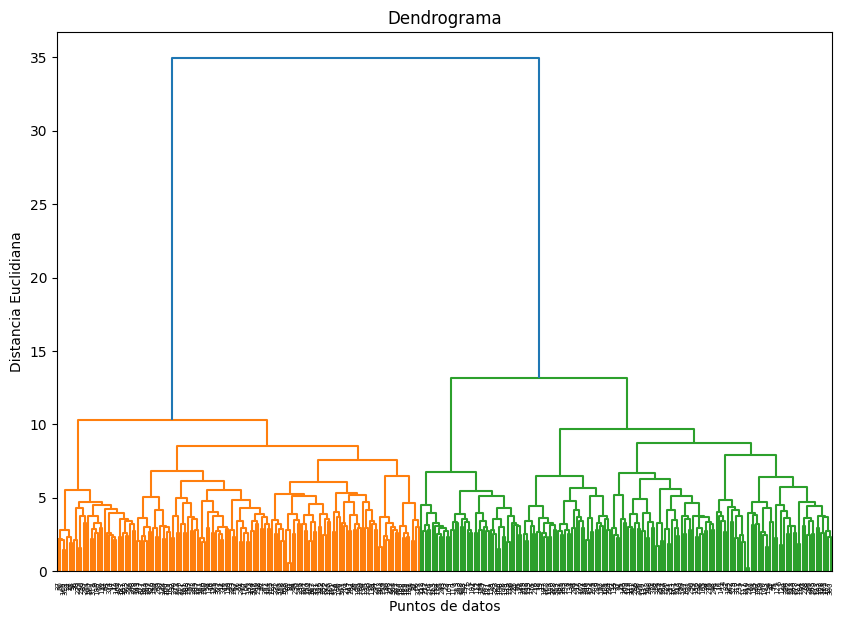

In [23]:
# Visualización del dendrograma para determinar el número de clusters
plt.figure(figsize=(10, 7))
dendrogram = sch.dendrogram(sch.linkage(scaledNonBinaryVariables, method='ward'))
plt.title('Dendrograma')
plt.xlabel('Puntos de datos')
plt.ylabel('Distancia Euclidiana')
plt.show()

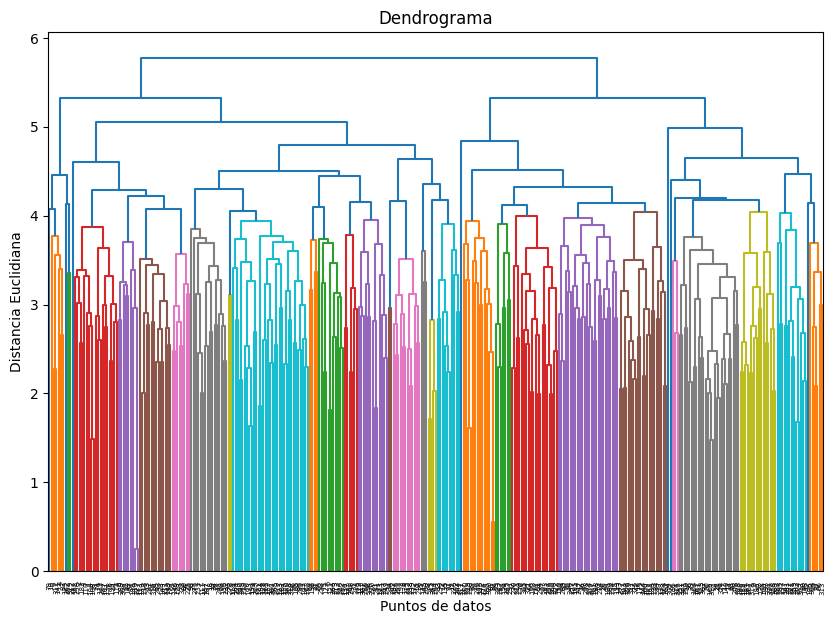

In [24]:
# Visualización del dendrograma para determinar el número de clústeres
plt.figure(figsize=(10, 7))
dendrogram = sch.dendrogram(sch.linkage(scaledNonBinaryVariables, method='complete'))
plt.title('Dendrograma')
plt.xlabel('Puntos de datos')
plt.ylabel('Distancia Euclidiana')
plt.show()

In [25]:
# Aplicación del algoritmo jerárquico (usando AgglomerativeClustering)
# Puedes ajustar el número de clusters (n_clusters) según el dendrograma
hierarchical_clustering = AgglomerativeClustering(n_clusters=2, metric='euclidean', linkage='ward')
clusters = hierarchical_clustering.fit_predict(scaledNonBinaryVariables)

# Añadimos los clusters obtenidos a nuestro DataFrame original
scaledNonBinaryVariables['cluster_hierarchical'] = clusters

# Visualización rápida de los clusters en el DataFrame
print(scaledNonBinaryVariables.head())

    embed_0   embed_1   embed_2   embed_3   embed_4   embed_5   embed_6  \
0 -0.229880  0.249529  0.081523  0.202636 -0.193608 -0.030638  0.188579   
1 -0.012822  0.149340  0.024315 -0.009801  0.088035 -0.033907  0.111280   
2 -0.055708  0.190835 -0.065515  0.225034  0.369172  0.113739  0.287937   
3  0.137942  0.176798 -0.032310  0.311785  0.261316  0.186766  0.018803   
4 -0.118311 -0.016865  0.039658  0.219906 -0.250331  0.054814 -0.052862   

    embed_7   embed_8   embed_9  ...  embed_383      ANIO   VOLUMEN  CUARTIL  \
0 -0.098298 -0.218437 -0.088780  ...  -0.089396  1.000000  0.000009     0.00   
1 -0.171367 -0.193791  0.289990  ...   0.034473  1.000000  0.000010     0.25   
2 -0.156514 -0.296518  0.024632  ...  -0.016509  1.000000  0.000006     0.25   
3 -0.187183 -0.103112  0.044219  ...   0.144255  0.888889  0.000010     0.25   
4  0.115424 -0.129113 -0.247627  ...   0.024610  1.000000  0.000810     0.75   

    PAGINAS  Cluster  cluster_MacQueen  cluster_Elkans  cluster_Soft

Otro intento

In [26]:
columns = ['Cluster', 'cluster_MacQueen', 'cluster_Elkans', 'cluster_SoftKMeans', 'cluster_hierarchical']
resultados = calcular_metricas_clustering(scaledNonBinaryVariables, columns)

# Mostrar resultados
for col, metricas in resultados.items():
    print(f"{col} -> Silhouette Score: {metricas['Silhouette Score']}, "
          f"Calinski-Harabasz: {metricas['Calinski-Harabasz']}, "
          f"Davies-Bouldin: {metricas['Davies-Bouldin']}")

Cluster -> Silhouette Score: 0.04522993076390162, Calinski-Harabasz: 16.97227898884339, Davies-Bouldin: 4.373675484893072
cluster_MacQueen -> Silhouette Score: 0.07993455807357656, Calinski-Harabasz: 1.9648081593807394, Davies-Bouldin: 1.6153734189584676
cluster_Elkans -> Silhouette Score: 0.04522993076390162, Calinski-Harabasz: 16.97227898884339, Davies-Bouldin: 4.373675484893072
cluster_SoftKMeans -> Silhouette Score: 0.04522993076390162, Calinski-Harabasz: 16.97227898884339, Davies-Bouldin: 4.373675484893072
cluster_hierarchical -> Silhouette Score: 0.04522993076390162, Calinski-Harabasz: 16.97227898884339, Davies-Bouldin: 4.373675484893072


In [27]:
# Aplicación del algoritmo jerárquico (usando AgglomerativeClustering)
# Puedes ajustar el número de clusters (n_clusters) según el dendrograma
hierarchical_clustering1 = AgglomerativeClustering(n_clusters=4, metric='euclidean', linkage='ward')
clusters = hierarchical_clustering1.fit_predict(scaledNonBinaryVariables)

# Añadimos los clusters obtenidos a nuestro DataFrame original
scaledNonBinaryVariables['cluster_hierarchical1'] = clusters

# Visualización rápida de los clusters en el DataFrame
print(scaledNonBinaryVariables.head())

    embed_0   embed_1   embed_2   embed_3   embed_4   embed_5   embed_6  \
0 -0.229880  0.249529  0.081523  0.202636 -0.193608 -0.030638  0.188579   
1 -0.012822  0.149340  0.024315 -0.009801  0.088035 -0.033907  0.111280   
2 -0.055708  0.190835 -0.065515  0.225034  0.369172  0.113739  0.287937   
3  0.137942  0.176798 -0.032310  0.311785  0.261316  0.186766  0.018803   
4 -0.118311 -0.016865  0.039658  0.219906 -0.250331  0.054814 -0.052862   

    embed_7   embed_8   embed_9  ...      ANIO   VOLUMEN  CUARTIL   PAGINAS  \
0 -0.098298 -0.218437 -0.088780  ...  1.000000  0.000009     0.00  0.113402   
1 -0.171367 -0.193791  0.289990  ...  1.000000  0.000010     0.25  0.164948   
2 -0.156514 -0.296518  0.024632  ...  1.000000  0.000006     0.25  0.154639   
3 -0.187183 -0.103112  0.044219  ...  0.888889  0.000010     0.25  0.185567   
4  0.115424 -0.129113 -0.247627  ...  1.000000  0.000810     0.75  0.082474   

   Cluster  cluster_MacQueen  cluster_Elkans  cluster_SoftKMeans  \
0     

In [28]:
columns = ['Cluster', 'cluster_MacQueen', 'cluster_Elkans', 'cluster_SoftKMeans', 'cluster_hierarchical', 'cluster_hierarchical1']
resultados = calcular_metricas_clustering(scaledNonBinaryVariables, columns)

# Mostrar resultados
for col, metricas in resultados.items():
    print(f"{col} -> Silhouette Score: {metricas['Silhouette Score']}, "
          f"Calinski-Harabasz: {metricas['Calinski-Harabasz']}, "
          f"Davies-Bouldin: {metricas['Davies-Bouldin']}")

Cluster -> Silhouette Score: 0.04522993076390162, Calinski-Harabasz: 16.97227898884339, Davies-Bouldin: 4.373675484893072
cluster_MacQueen -> Silhouette Score: 0.07993455807357656, Calinski-Harabasz: 1.9648081593807394, Davies-Bouldin: 1.6153734189584676
cluster_Elkans -> Silhouette Score: 0.04522993076390162, Calinski-Harabasz: 16.97227898884339, Davies-Bouldin: 4.373675484893072
cluster_SoftKMeans -> Silhouette Score: 0.04522993076390162, Calinski-Harabasz: 16.97227898884339, Davies-Bouldin: 4.373675484893072
cluster_hierarchical -> Silhouette Score: 0.04522993076390162, Calinski-Harabasz: 16.97227898884339, Davies-Bouldin: 4.373675484893072
cluster_hierarchical1 -> Silhouette Score: 0.03286559020073452, Calinski-Harabasz: 13.362072780357297, Davies-Bouldin: 3.5278166285144983


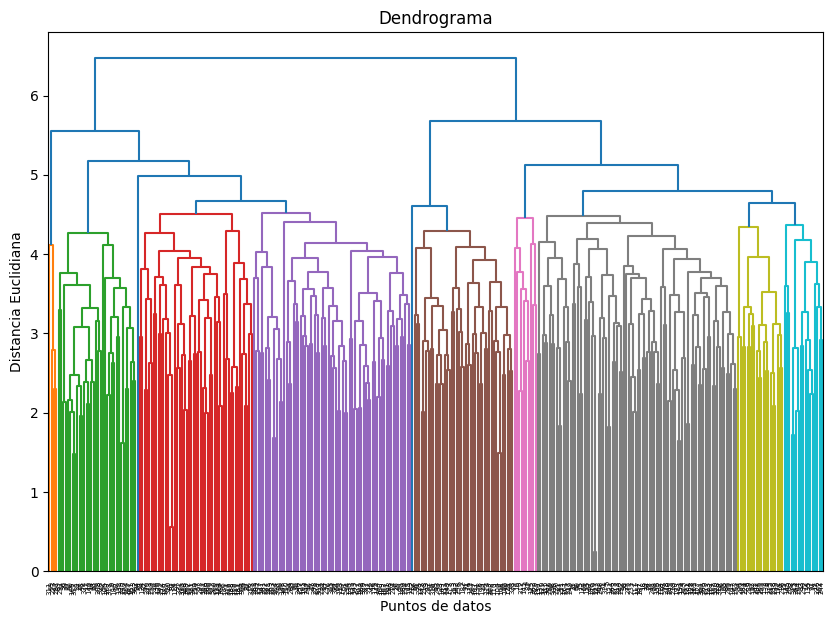

In [29]:
# Visualización del dendrograma para determinar el número de clústeres
plt.figure(figsize=(10, 7))
dendrogram = sch.dendrogram(sch.linkage(scaledNonBinaryVariables, method='complete'))
plt.title('Dendrograma')
plt.xlabel('Puntos de datos')
plt.ylabel('Distancia Euclidiana')
plt.show()

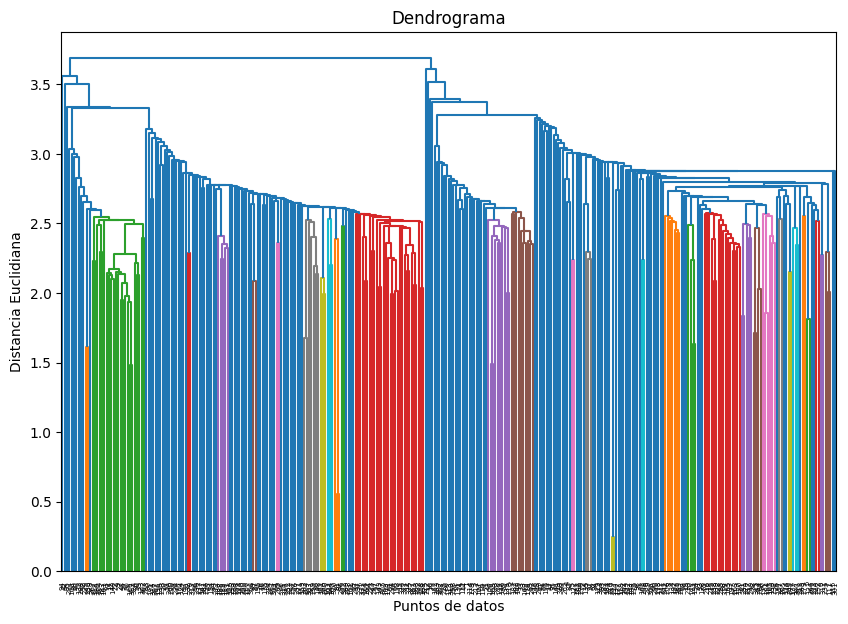

In [30]:
# Visualización del dendrograma para determinar el número de clústeres
plt.figure(figsize=(10, 7))
dendrogram = sch.dendrogram(sch.linkage(scaledNonBinaryVariables, method='single'))
plt.title('Dendrograma')
plt.xlabel('Puntos de datos')
plt.ylabel('Distancia Euclidiana')
plt.show()

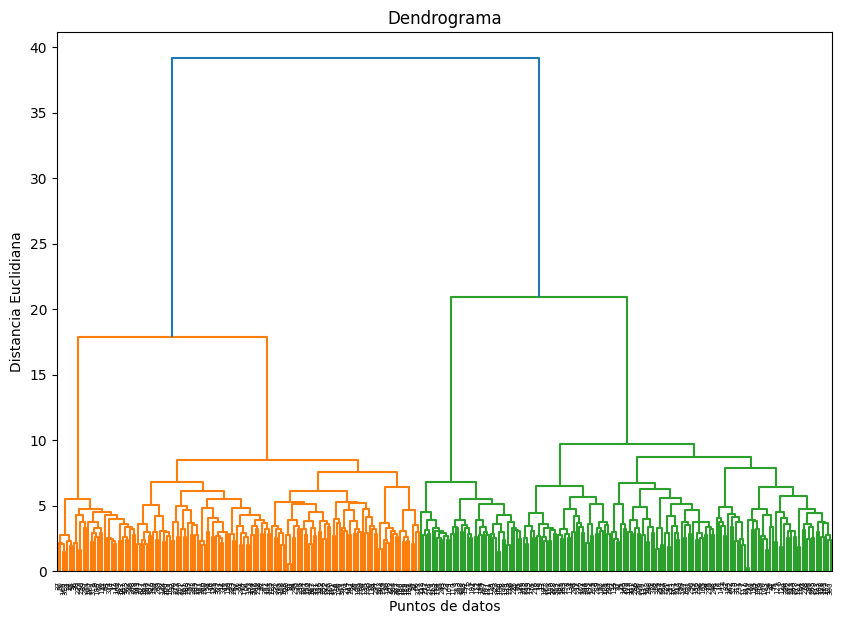

In [31]:
# Visualización del dendrograma para determinar el número de clusters
plt.figure(figsize=(10, 7))
dendrogram = sch.dendrogram(sch.linkage(scaledNonBinaryVariables, method='ward'))
plt.title('Dendrograma')
plt.xlabel('Puntos de datos')
plt.ylabel('Distancia Euclidiana')
plt.show()

## DBSCAN

### vecino mas cercano

In [32]:
# Utilizamos NearestNeighbors para calcular las distancias
neighbors = NearestNeighbors(n_neighbors=4) # 4
columns = ['Cluster', 'cluster_MacQueen', 'cluster_Elkans', 'cluster_SoftKMeans', 'cluster_hierarchical']
#, 'cluster_DBSCAN1', 'cluster_DBSCAN2', 'cluster_DBSCANKdTree'
dfDBSCAN = scaledNonBinaryVariables.drop(columns, axis=1)
neighbors_fit = neighbors.fit(dfDBSCAN)
distances, indices = neighbors_fit.kneighbors(dfDBSCAN)

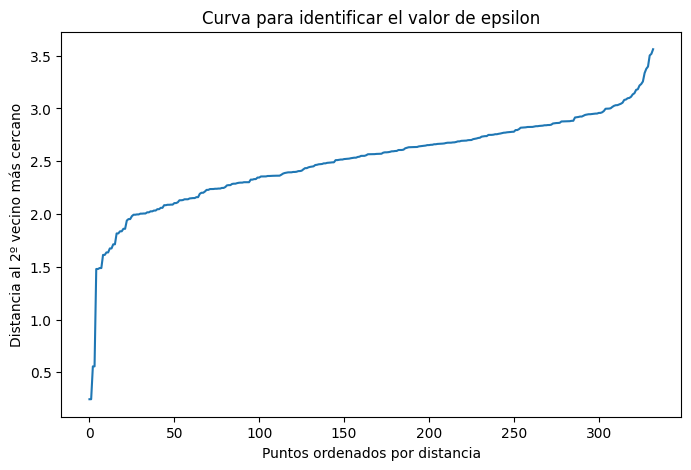

In [33]:
# Ordenamos las distancias (cogemos la cuarta distancia, ya que utilizamos n_neighbors=4)
distances = np.sort(distances[:, 1], axis=0)

# Graficamos las distancias para identificar el "codo"
plt.figure(figsize=(8, 5))
plt.plot(distances)
plt.title("Curva para identificar el valor de epsilon")
plt.xlabel("Puntos ordenados por distancia")
plt.ylabel("Distancia al 2º vecino más cercano")
plt.show()

 Tenemos una curva de distancias que empieza plana (puntos muy cercanos) y luego sube bruscamente. El codo en esa curva representa el punto donde el valor de epsilon es lo suficientemente grande como para capturar clusters densos pero lo suficientemente pequeño como para no incluir puntos aislados o ruidosos

In [34]:
# Una vez identificado el codo en la gráfica, podemos usar el valor correspondiente para epsilon en DBSCAN
epsilon_optimo = 3  # Este valor lo seleccionas basándonos en la gráfica
dbscan = DBSCAN(eps=epsilon_optimo, min_samples=5)
clusters = dbscan.fit_predict(scaledNonBinaryVariables)
# Añadimos los clústeres obtenidos a nuestro DataFrame original
scaledNonBinaryVariables['cluster_DBSCAN'] = clusters

In [35]:
columns = ['Cluster', 'cluster_MacQueen', 'cluster_Elkans', 'cluster_SoftKMeans', 'cluster_hierarchical', 'cluster_DBSCAN']
resultados = calcular_metricas_clustering(scaledNonBinaryVariables, columns)

# Mostrar resultados
for col, metricas in resultados.items():
    print(f"{col} -> Silhouette Score: {metricas['Silhouette Score']}, "
          f"Calinski-Harabasz: {metricas['Calinski-Harabasz']}, "
          f"Davies-Bouldin: {metricas['Davies-Bouldin']}")

Cluster -> Silhouette Score: 0.06515390912506229, Calinski-Harabasz: 25.157582578420556, Davies-Bouldin: 3.5907750078413017
cluster_MacQueen -> Silhouette Score: 0.06726651351174219, Calinski-Harabasz: 1.9555873683691543, Davies-Bouldin: 1.5806219055511417
cluster_Elkans -> Silhouette Score: 0.06515390912506229, Calinski-Harabasz: 25.157582578420556, Davies-Bouldin: 3.5907750078413017
cluster_SoftKMeans -> Silhouette Score: 0.06515390912506229, Calinski-Harabasz: 25.157582578420556, Davies-Bouldin: 3.5907750078413017
cluster_hierarchical -> Silhouette Score: 0.06515390912506229, Calinski-Harabasz: 25.157582578420556, Davies-Bouldin: 3.5907750078413017
cluster_DBSCAN -> Silhouette Score: 0.07535654052616504, Calinski-Harabasz: 17.91235611568622, Davies-Bouldin: 3.3884710256019783


In [36]:
# Utilizamos NearestNeighbors para calcular las distancias
neighbors = NearestNeighbors(n_neighbors=20)
dfDBSCAN = scaledNonBinaryVariables.drop(columns, axis=1)
neighbors_fit = neighbors.fit(dfDBSCAN)
distances, indices = neighbors_fit.kneighbors(dfDBSCAN)

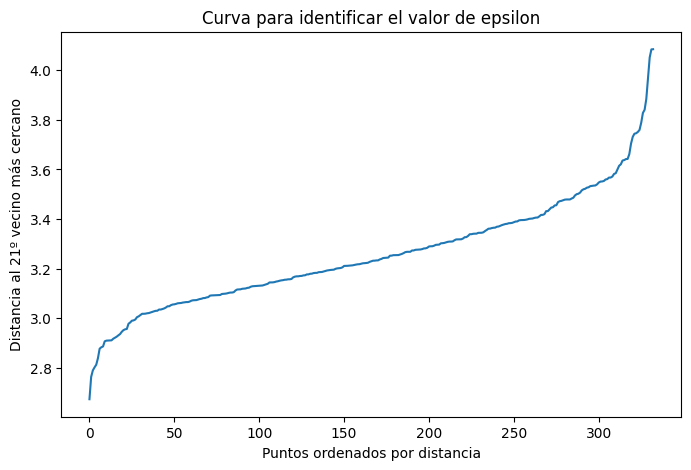

In [37]:
# Ordenamos las distancias (cogemos la cuarta distancia, ya que utilizamos n_neighbors=20)
distances = np.sort(distances[:, 19], axis=0)

# Graficamos las distancias para identificar el "codo"
plt.figure(figsize=(8, 5))
plt.plot(distances)
plt.title("Curva para identificar el valor de epsilon")
plt.xlabel("Puntos ordenados por distancia")
plt.ylabel("Distancia al 21º vecino más cercano")
plt.show()

In [38]:
# Una vez identificado el codo en la gráfica, podemos usar el valor correspondiente para epsilon en DBSCAN
# Por ejemplo:
epsilon_optimo = 3  # Este valor lo seleccionas basándonos en la gráfica (no funciona con uno diferente de 3 en este momento)
dbscan = DBSCAN(eps=epsilon_optimo, min_samples=20)
clusters = dbscan.fit_predict(dfDBSCAN)
# Añadimos los clústeres obtenidos a nuestro DataFrame original
scaledNonBinaryVariables['cluster_DBSCAN1'] = clusters

In [39]:
columns = ['Cluster', 'cluster_MacQueen', 'cluster_Elkans', 'cluster_SoftKMeans', 'cluster_hierarchical', 'cluster_hierarchical1', 'cluster_DBSCAN', 'cluster_DBSCAN1']
resultados = calcular_metricas_clustering(scaledNonBinaryVariables, columns)

# Mostrar resultados
for col, metricas in resultados.items():
    print(f"{col} -> Silhouette Score: {metricas['Silhouette Score']}, "
          f"Calinski-Harabasz: {metricas['Calinski-Harabasz']}, "
          f"Davies-Bouldin: {metricas['Davies-Bouldin']}")

Cluster -> Silhouette Score: 0.04522993076390162, Calinski-Harabasz: 16.97227898884339, Davies-Bouldin: 4.373675484893072
cluster_MacQueen -> Silhouette Score: 0.07993455807357656, Calinski-Harabasz: 1.9648081593807394, Davies-Bouldin: 1.6153734189584676
cluster_Elkans -> Silhouette Score: 0.04522993076390162, Calinski-Harabasz: 16.97227898884339, Davies-Bouldin: 4.373675484893072
cluster_SoftKMeans -> Silhouette Score: 0.04522993076390162, Calinski-Harabasz: 16.97227898884339, Davies-Bouldin: 4.373675484893072
cluster_hierarchical -> Silhouette Score: 0.04522993076390162, Calinski-Harabasz: 16.97227898884339, Davies-Bouldin: 4.373675484893072
cluster_hierarchical1 -> Silhouette Score: 0.03286559020073452, Calinski-Harabasz: 13.362072780357297, Davies-Bouldin: 3.5278166285144983
cluster_DBSCAN -> Silhouette Score: 0.02598457400045088, Calinski-Harabasz: 9.287854302662714, Davies-Bouldin: 4.075012593117214
cluster_DBSCAN1 -> Silhouette Score: -0.0021774980377008164, Calinski-Harabasz: 6

### optimizar los hiperparámetros

In [40]:
columns = ['Cluster', 'cluster_MacQueen', 'cluster_Elkans', 'cluster_SoftKMeans', 'cluster_hierarchical', 'cluster_DBSCAN', 'cluster_DBSCAN1']
dfDBSCAN = scaledNonBinaryVariables.drop(columns, axis=1)

def evaluate_model(estimator, X):
    labels = estimator.fit_predict(X)
    # Evitar calcular silhouette si el modelo crea solo un clúster o asigna todo como ruido
    if len(set(labels)) > 1 and len(set(labels)) < len(X):
        return silhouette_score(X, labels)
    else:
        return -1  # Asignar puntaje bajo si hay un solo cluster o demasiado ruido

#### RandomizedSearchCV

In [41]:
# # Definir el rango de parámetros
# param_dist = {
#     'eps': uniform(1, 10),  # Se probarán valores entre 1 y 10
#     'min_samples': range(2, 15)  # Mínimo número de puntos para formar un cluster
# }

# # Crear el modelo de DBSCAN
# dbscan = DBSCAN()

# # Definir el RandomizedSearchCV
# random_search = RandomizedSearchCV(
#     estimator=dbscan,
#     param_distributions=param_dist,
#     n_iter=10,  # Número de combinaciones a probar
#     scoring=make_scorer(evaluate_model),
#     cv=[(slice(None), slice(None))],  # Necesario para evitar el uso de validación cruzada
#     verbose=1,
#     n_jobs=-1
# )

# # Ejecutar el RandomizedSearchCV
# random_search.fit(dfDBSCAN)

# print(f"Mejores parámetros encontrados: {random_search.best_params_}")

#### GridSearchCV

In [42]:
# # Definir los parámetros a probar
# param_grid = {
#     'eps': np.arange(1, 12, 2),  # Valores de eps entre 0.1 y 1.0 en pasos de 0.1
#     'min_samples': range(5, 15)  # Probar diferentes números de muestras mínimas
# }

# # Definir el GridSearchCV
# grid_search = GridSearchCV(
#     estimator=DBSCAN(),
#     param_grid=param_grid,
#     scoring=make_scorer(evaluate_model),
#     cv=[(slice(None), slice(None))],  # Evitar el uso de validación cruzada
#     verbose=1,
#     n_jobs=-1
# )

# # Ejecutar el GridSearchCV
# grid_search.fit(dfDBSCAN)

# print(f"Mejores parámetros encontrados: {grid_search.best_params_}")

A medida que aumenta el número de dimensiones, la distancia entre los puntos en el espacio se incrementa significativamente. En espacios de alta dimensionalidad, es posible que incluso los puntos cercanos aparezcan muy separados en términos de distancia euclidiana, lo que afecta negativamente la capacidad de DBSCAN para identificar clústeres correctamente.

Elección de epsilon:

En espacios de alta dimensionalidad, elegir un valor adecuado para epsilon se vuelve extremadamente complicado, ya que las distancias se expanden mucho más rápidamente que en espacios de baja dimensionalidad.
min_samples = Dimensión + 1 puede ser demasiado restrictivo:

Aunque teóricamente es una recomendación, en la práctica, en conjuntos de datos de alta dimensionalidad, este valor podría ser demasiado alto. Como resultado, muchos puntos no alcanzan el número mínimo de vecinos necesarios para ser considerados puntos "centrales", lo que puede causar que el algoritmo identifique muchos puntos como ruido o que no logre formar clusters.

#### Otro evaluate_model

In [43]:
def evaluate_model(estimator, X):
    labels = estimator.fit_predict(X)
    if len(set(labels)) > 1:  # Asegurar que hay más de un cluster
        return silhouette_score(X, labels)
    else:
        return -1  # Devolver -1 si solo hay un cluster o todo es ruido

In [44]:
# # Definir los parámetros a probar
# param_grid = {
#     'eps': np.arange(1, 12, 1.5),  # Valores de eps entre 0.1 y 1.0 en pasos de 0.1
#     'min_samples': range(5, 15)  # Probar diferentes números de muestras mínimas
# }

# # Definir el GridSearchCV
# grid_search = GridSearchCV(
#     estimator=DBSCAN(),
#     param_grid=param_grid,
#     scoring=make_scorer(evaluate_model),
#     cv=[(slice(None), slice(None))],  # Evitar el uso de validación cruzada
#     verbose=1,
#     n_jobs=-1
# )

# # Ejecutar el GridSearchCV
# grid_search.fit(dfDBSCAN)

# print(f"Mejores parámetros encontrados: {grid_search.best_params_}")

In [45]:
epsilon_optimo = 3  # Este valor lo seleccionas basándonos en la gráfica (qeu actulamente no sale)
dbscan = DBSCAN(eps=epsilon_optimo, min_samples=11)
clusters = dbscan.fit_predict(dfDBSCAN)
# Añadimos los clústeres obtenidos a nuestro DataFrame original
scaledNonBinaryVariables['cluster_DBSCAN2'] = clusters

In [46]:
columns = ['Cluster', 'cluster_MacQueen', 'cluster_Elkans', 'cluster_SoftKMeans', 'cluster_hierarchical', 'cluster_hierarchical1', 'cluster_DBSCAN', 'cluster_DBSCAN1', 'cluster_DBSCAN2']

resultados = calcular_metricas_clustering(scaledNonBinaryVariables, columns)

# Mostrar resultados
for col, metricas in resultados.items():
    print(f"{col} -> Silhouette Score: {metricas['Silhouette Score']}, "
          f"Calinski-Harabasz: {metricas['Calinski-Harabasz']}, "
          f"Davies-Bouldin: {metricas['Davies-Bouldin']}")

Cluster -> Silhouette Score: 0.04522993076390162, Calinski-Harabasz: 16.97227898884339, Davies-Bouldin: 4.373675484893072
cluster_MacQueen -> Silhouette Score: 0.07993455807357656, Calinski-Harabasz: 1.9648081593807394, Davies-Bouldin: 1.6153734189584676
cluster_Elkans -> Silhouette Score: 0.04522993076390162, Calinski-Harabasz: 16.97227898884339, Davies-Bouldin: 4.373675484893072
cluster_SoftKMeans -> Silhouette Score: 0.04522993076390162, Calinski-Harabasz: 16.97227898884339, Davies-Bouldin: 4.373675484893072
cluster_hierarchical -> Silhouette Score: 0.04522993076390162, Calinski-Harabasz: 16.97227898884339, Davies-Bouldin: 4.373675484893072
cluster_hierarchical1 -> Silhouette Score: 0.03286559020073452, Calinski-Harabasz: 13.362072780357297, Davies-Bouldin: 3.5278166285144983
cluster_DBSCAN -> Silhouette Score: 0.02598457400045088, Calinski-Harabasz: 9.287854302662714, Davies-Bouldin: 4.075012593117214
cluster_DBSCAN1 -> Silhouette Score: -0.0021774980377008164, Calinski-Harabasz: 6

In [47]:
db = DBSCAN(eps=3, min_samples=10, algorithm='kd_tree', leaf_size=30)
db.fit(dfDBSCAN)

# Obtenemos las etiquetas de los clusters
clusters = db.labels_
scaledNonBinaryVariables['cluster_DBSCANKdTree'] = clusters

In [48]:
columns = ['Cluster', 'cluster_MacQueen', 'cluster_Elkans', 'cluster_SoftKMeans', 'cluster_hierarchical', 'cluster_hierarchical1', 'cluster_DBSCAN', 'cluster_DBSCAN1', 'cluster_DBSCAN2','cluster_DBSCANKdTree']
resultados = calcular_metricas_clustering(scaledNonBinaryVariables, columns)

# Mostrar resultados
for col, metricas in resultados.items():
    print(f"{col} -> Silhouette Score: {metricas['Silhouette Score']}, "
          f"Calinski-Harabasz: {metricas['Calinski-Harabasz']}, "
          f"Davies-Bouldin: {metricas['Davies-Bouldin']}")

Cluster -> Silhouette Score: 0.04522993076390162, Calinski-Harabasz: 16.97227898884339, Davies-Bouldin: 4.373675484893072
cluster_MacQueen -> Silhouette Score: 0.07993455807357656, Calinski-Harabasz: 1.9648081593807394, Davies-Bouldin: 1.6153734189584676
cluster_Elkans -> Silhouette Score: 0.04522993076390162, Calinski-Harabasz: 16.97227898884339, Davies-Bouldin: 4.373675484893072
cluster_SoftKMeans -> Silhouette Score: 0.04522993076390162, Calinski-Harabasz: 16.97227898884339, Davies-Bouldin: 4.373675484893072
cluster_hierarchical -> Silhouette Score: 0.04522993076390162, Calinski-Harabasz: 16.97227898884339, Davies-Bouldin: 4.373675484893072
cluster_hierarchical1 -> Silhouette Score: 0.03286559020073452, Calinski-Harabasz: 13.362072780357297, Davies-Bouldin: 3.5278166285144983
cluster_DBSCAN -> Silhouette Score: 0.02598457400045088, Calinski-Harabasz: 9.287854302662714, Davies-Bouldin: 4.075012593117214
cluster_DBSCAN1 -> Silhouette Score: -0.0021774980377008164, Calinski-Harabasz: 6

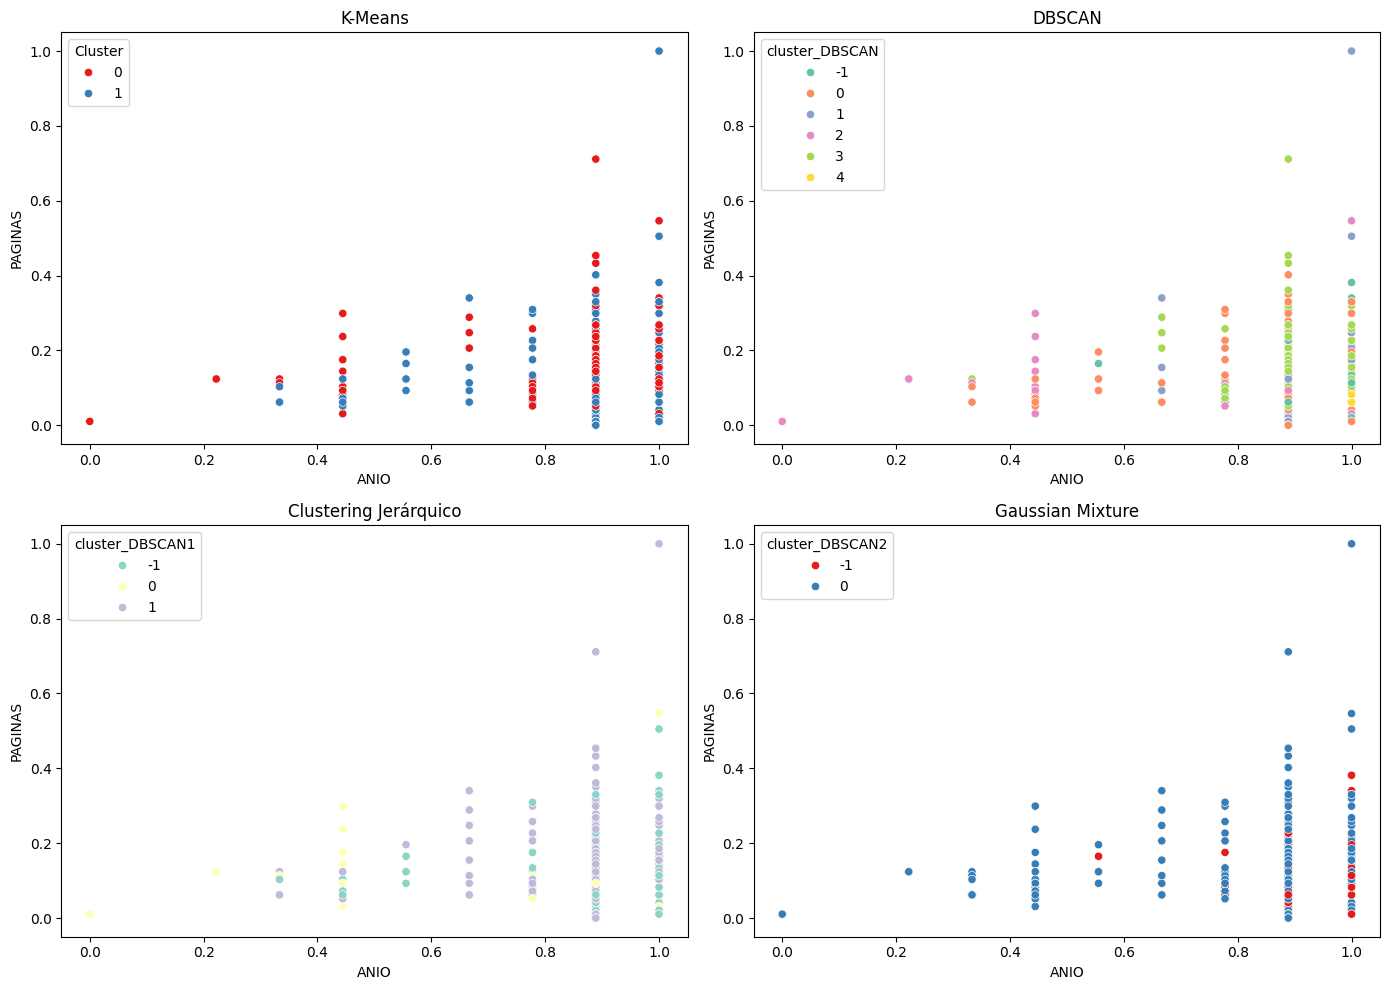

In [49]:
# Crear subplots para cada agrupamiento
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Graficar usando seaborn para cada uno de los clústeres
sns.scatterplot(data=scaledNonBinaryVariables, x='ANIO', y='PAGINAS', hue='Cluster', ax=axes[0, 0], palette='Set1')
axes[0, 0].set_title('K-Means')

sns.scatterplot(data=scaledNonBinaryVariables, x='ANIO', y='PAGINAS', hue='cluster_DBSCAN', ax=axes[0, 1], palette='Set2')
axes[0, 1].set_title('DBSCAN')

sns.scatterplot(data=scaledNonBinaryVariables, x='ANIO', y='PAGINAS', hue='cluster_DBSCAN1', ax=axes[1, 0], palette='Set3')
axes[1, 0].set_title('Clustering Jerárquico')

sns.scatterplot(data=scaledNonBinaryVariables, x='ANIO', y='PAGINAS', hue='cluster_DBSCAN2', ax=axes[1, 1], palette='Set1')
axes[1, 1].set_title('Gaussian Mixture')

# Ajustar el espaciado
plt.tight_layout()
plt.show()

#[, 'cluster_MacQueen', 'cluster_Elkans', 'cluster_SoftKMeans', , 'cluster_hierarchical1', , , 'cluster_DBSCAN2']

## KMeans con reduccion de dimensionalidad

In [50]:
data_reduce.keys()

Index(['X_pca_2d_1', 'X_pca_2d_2', 'X_pca_3d_1', 'X_pca_3d_2', 'X_pca_3d_3',
       'tsne_result_1', 'tsne_result_2', 'data_mds_1', 'data_mds_2',
       'data_isomap_1', 'data_isomap_2'],
      dtype='object')

#### PCA 2D

In [51]:
data_pca2d = data_reduce[['X_pca_2d_1', 'X_pca_2d_2']]
n_clusters = 2

In [52]:
kmeans_2d = KMeans(n_clusters=n_clusters, random_state=42)
kmeans_2d_labels = kmeans_2d.fit_predict(data_pca2d)

data_pca2d['Clusters_2PCAK_Means'] = kmeans_2d_labels
data_reduce['Clusters_2PCAK_Means'] = kmeans_2d_labels
scaledNonBinaryVariables['Clusters_2PCAK_Means'] = kmeans_2d_labels

C:\Users\saraujo\AppData\Local\Temp\ipykernel_16584\1800422241.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_pca2d['Clusters_2PCAK_Means'] = kmeans_2d_labels


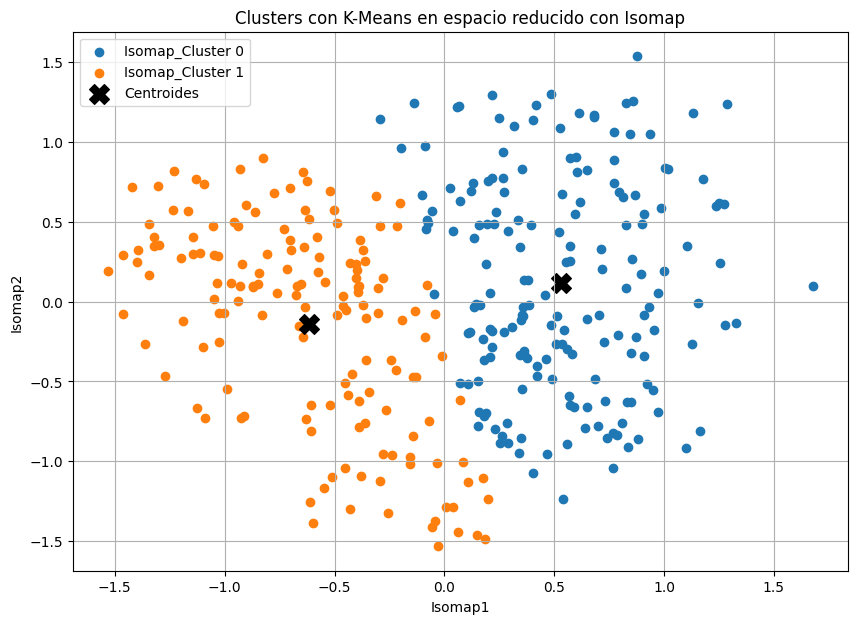

In [53]:
# Visualización de los clusters en el espacio Isomap
plt.figure(figsize=(10, 7))
for cluster in range(n_clusters):
    plt.scatter(data_pca2d[data_pca2d['Clusters_2PCAK_Means'] == cluster]['X_pca_2d_1'], 
                data_pca2d[data_pca2d['Clusters_2PCAK_Means'] == cluster]['X_pca_2d_2'], 
                label=f'Isomap_Cluster {cluster}')
plt.scatter(kmeans_2d.cluster_centers_[:, 0], kmeans_2d.cluster_centers_[:, 1], 
            s=200, c='black', marker='X', label='Centroides')  # Visualizar los centroides
plt.title('Clusters con K-Means en espacio reducido con Isomap')
plt.xlabel('Isomap1')
plt.ylabel('Isomap2')
plt.legend()
plt.grid()
plt.show()

In [54]:
resultados = calcular_metricas_clustering(data_pca2d, ['Clusters_2PCAK_Means'])

# Mostrar resultados
for col, metricas in resultados.items():
    print(f"{col} -> Silhouette Score: {metricas['Silhouette Score']}, "
          f"Calinski-Harabasz: {metricas['Calinski-Harabasz']}, "
          f"Davies-Bouldin: {metricas['Davies-Bouldin']}")

Clusters_2PCAK_Means -> Silhouette Score: 0.3530207125418302, Calinski-Harabasz: 197.2563470515554, Davies-Bouldin: 1.1743454822274855


#### PCA 3D

In [55]:
data_pca3d = data_reduce[['X_pca_3d_1', 'X_pca_3d_2', 'X_pca_3d_3']]
n_clusters = 2

In [56]:
# Aplicar K-Means con 2 clusters (puedes cambiar el número de clusters si lo deseas)
kmeans_3d = KMeans(n_clusters=n_clusters, random_state=42)
kmeans_3d.fit(data_pca3d)

# Obtener las etiquetas predichas por K-Means
labels_kmeans = kmeans.labels_
data_pca3d['Clusters_3PCAK_Means'] = labels_kmeans
data_reduce['Clusters_3PCAK_Means'] = labels_kmeans
scaledNonBinaryVariables['Clusters_3PCAK_Means'] = labels_kmeans

C:\Users\saraujo\AppData\Local\Temp\ipykernel_16584\2582623761.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_pca3d['Clusters_3PCAK_Means'] = labels_kmeans


In [57]:
resultados = calcular_metricas_clustering(data_pca3d, ['Clusters_3PCAK_Means'])

# Mostrar resultados
for col, metricas in resultados.items():
    print(f"{col} -> Silhouette Score: {metricas['Silhouette Score']}, "
          f"Calinski-Harabasz: {metricas['Calinski-Harabasz']}, "
          f"Davies-Bouldin: {metricas['Davies-Bouldin']}")

Clusters_3PCAK_Means -> Silhouette Score: 0.26468064830675997, Calinski-Harabasz: 118.65943338089454, Davies-Bouldin: 1.5349207975304657


#### TSNE

In [58]:
data_tsne = data_reduce[['tsne_result_1', 'tsne_result_2']]
n_clusters = 2

In [59]:
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
data_tsne['t-SNEKMeans'] = kmeans.fit_predict(data_tsne)
data_reduce['t-SNEKMeans'] = data_tsne['t-SNEKMeans']
scaledNonBinaryVariables['t-SNEKMeans'] = data_tsne['t-SNEKMeans']

C:\Users\saraujo\AppData\Local\Temp\ipykernel_16584\1386707797.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_tsne['t-SNEKMeans'] = kmeans.fit_predict(data_tsne)


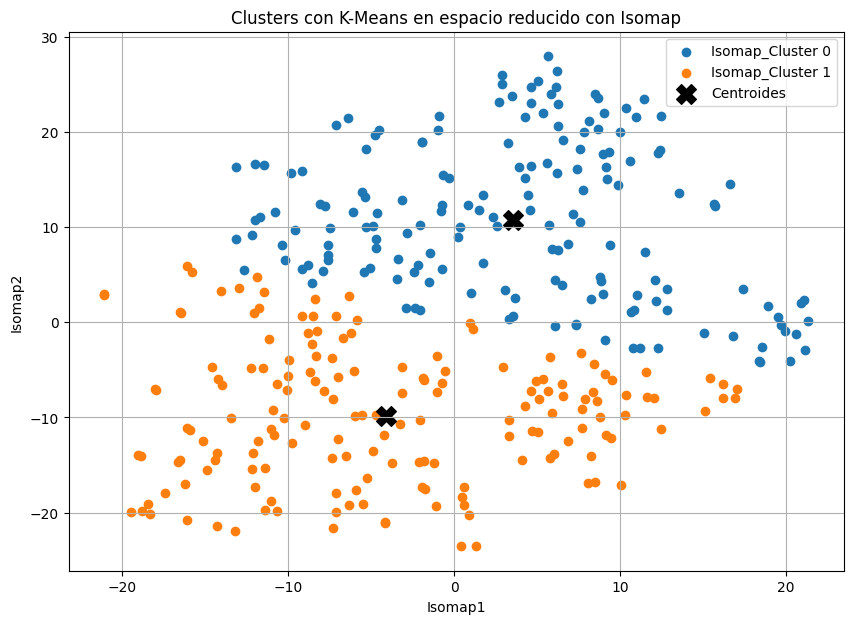

In [60]:
# Visualización de los clusters en el espacio Isomap
plt.figure(figsize=(10, 7))
for cluster in range(n_clusters):
    plt.scatter(data_tsne[data_tsne['t-SNEKMeans'] == cluster]['tsne_result_1'], 
                data_tsne[data_tsne['t-SNEKMeans'] == cluster]['tsne_result_2'], 
                label=f'Isomap_Cluster {cluster}')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            s=200, c='black', marker='X', label='Centroides')  # Visualizar los centroides
plt.title('Clusters con K-Means en espacio reducido con Isomap')
plt.xlabel('Isomap1')
plt.ylabel('Isomap2')
plt.legend()
plt.grid()
plt.show()

In [61]:
resultados = calcular_metricas_clustering(data_tsne, ['t-SNEKMeans'])

# Mostrar resultados
for col, metricas in resultados.items():
    print(f"{col} -> Silhouette Score: {metricas['Silhouette Score']}, "
          f"Calinski-Harabasz: {metricas['Calinski-Harabasz']}, "
          f"Davies-Bouldin: {metricas['Davies-Bouldin']}")

t-SNEKMeans -> Silhouette Score: 0.3925775156231306, Calinski-Harabasz: 282.8980851759508, Davies-Bouldin: 0.9971455655856694


#### Multi-Dimensional Scaling 

In [62]:
data_mds = data_reduce[['data_mds_1', 'data_mds_2']]

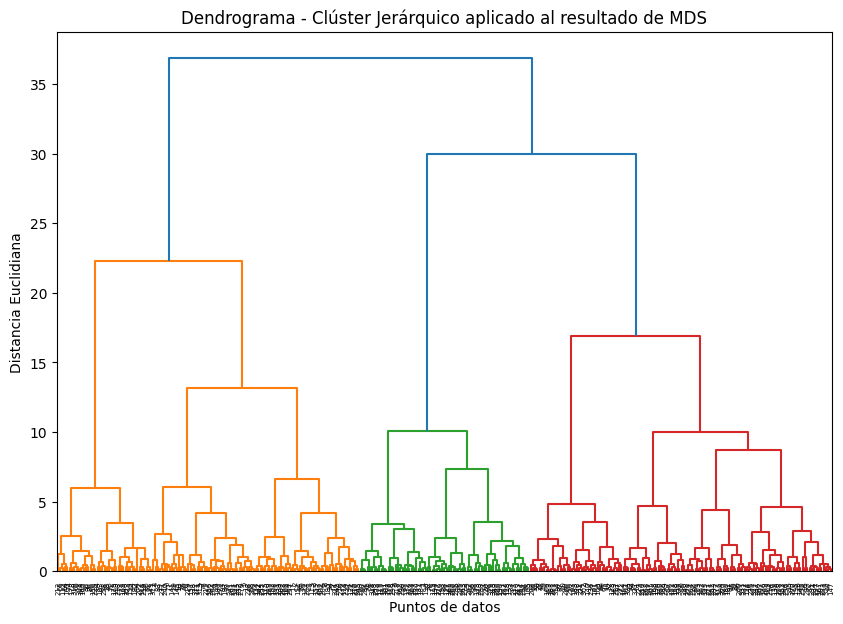

In [63]:
# Aplicar clustering jerárquico con el método de 'ward'
Z = sch.linkage(data_mds, method='ward')

# Graficar el dendrograma para observar la estructura de los clusters
plt.figure(figsize=(10, 7))
sch.dendrogram(Z)
plt.title('Dendrograma - Clúster Jerárquico aplicado al resultado de MDS')
plt.xlabel('Puntos de datos')
plt.ylabel('Distancia Euclidiana')
plt.show()

C:\Users\saraujo\AppData\Local\Temp\ipykernel_16584\1676930036.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_mds['MDS_Cluster'] = clusters


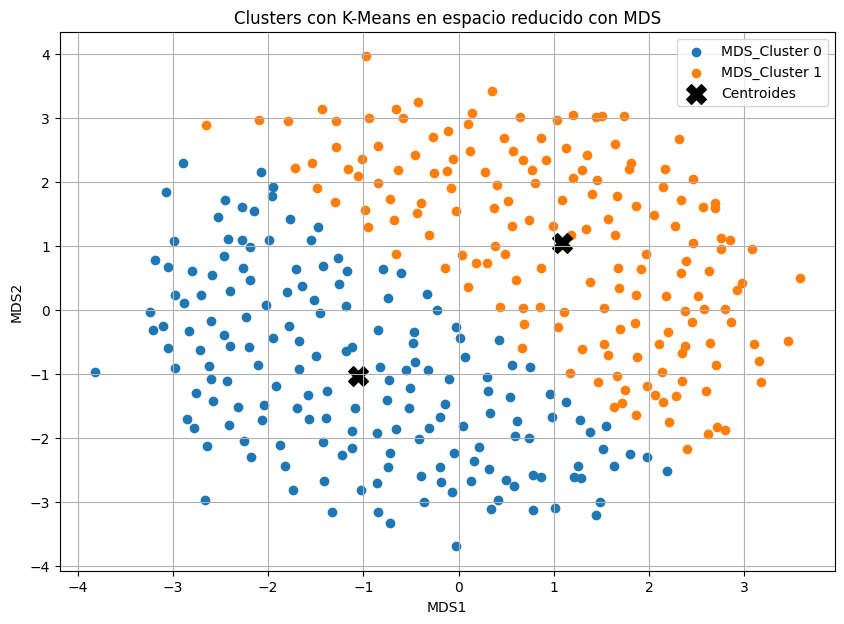

In [64]:
n_clusters = 2  # Puedes ajustar el número según tu análisis
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(data_mds)  # Usamos solo las columnas MDS1 y MDS2

# Agregamos los clusters al DataFrame reducido
data_mds['MDS_Cluster'] = clusters
scaledNonBinaryVariables['MDS_Cluster']=clusters
data_reduce['MDS_Cluster']=clusters

# Visualización de los clusters en el espacio MDS
plt.figure(figsize=(10, 7))
for cluster in range(n_clusters):
    plt.scatter(data_mds[data_mds['MDS_Cluster'] == cluster]['data_mds_1'], 
                data_mds[data_mds['MDS_Cluster'] == cluster]['data_mds_2'], 
                label=f'MDS_Cluster {cluster}')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            s=200, c='black', marker='X', label='Centroides')  # Visualizar los centroides
plt.title('Clusters con K-Means en espacio reducido con MDS')
plt.xlabel('MDS1')
plt.ylabel('MDS2')
plt.legend()
plt.grid()
plt.show()

In [65]:
resultados = calcular_metricas_clustering(data_mds, ['MDS_Cluster'])

# Mostrar resultados
for col, metricas in resultados.items():
    print(f"{col} -> Silhouette Score: {metricas['Silhouette Score']}, "
          f"Calinski-Harabasz: {metricas['Calinski-Harabasz']}, "
          f"Davies-Bouldin: {metricas['Davies-Bouldin']}")

MDS_Cluster -> Silhouette Score: 0.3486602191162042, Calinski-Harabasz: 193.20558513608958, Davies-Bouldin: 1.2013731995911334


#### ISOMAP

In [66]:
df_isomap = data_reduce[['data_isomap_1', 'data_isomap_2']]

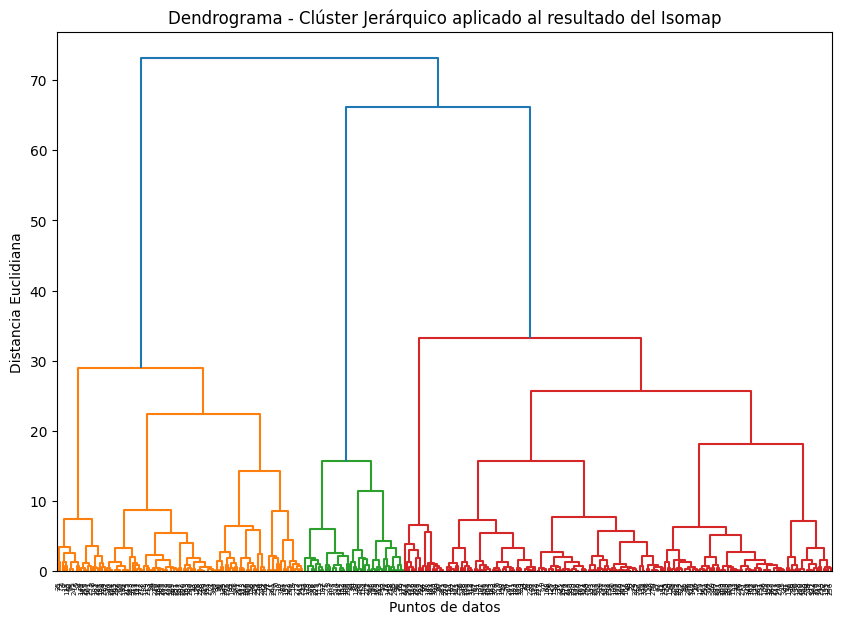

In [67]:
# Aplicar clustering jerárquico con el método de 'ward'
Z = sch.linkage(df_isomap, method='ward')

# Graficar el dendrograma para observar la estructura de los clusters
plt.figure(figsize=(10, 7))
sch.dendrogram(Z)
plt.title('Dendrograma - Clúster Jerárquico aplicado al resultado del Isomap')
plt.xlabel('Puntos de datos')
plt.ylabel('Distancia Euclidiana')
plt.show()

C:\Users\saraujo\AppData\Local\Temp\ipykernel_16584\2271352404.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_isomap['Isomap_Cluster'] = clusters


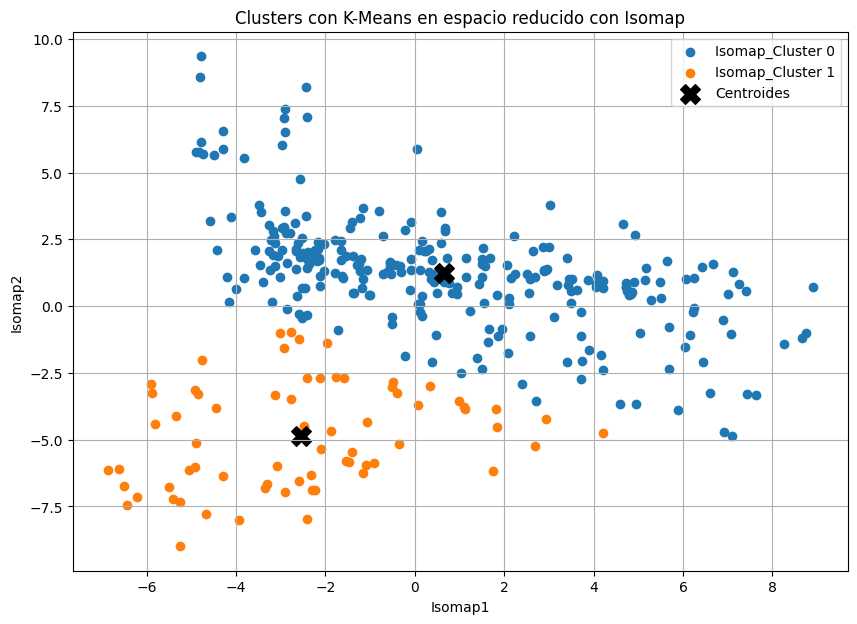

In [68]:
# Definir el número de clusters
n_clusters = 2

# Aplicar K-Means en el espacio reducido de Isomap
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(df_isomap)  # Utilizamos las dimensiones de Isomap

# Agregar los clusters al DataFrame de Isomap
df_isomap['Isomap_Cluster'] = clusters
scaledNonBinaryVariables['Isomap_Cluster']=clusters
data_reduce['Isomap_Cluster']=clusters


# Visualización de los clusters en el espacio Isomap
plt.figure(figsize=(10, 7))
for cluster in range(n_clusters):
    plt.scatter(df_isomap[df_isomap['Isomap_Cluster'] == cluster]['data_isomap_1'], 
                df_isomap[df_isomap['Isomap_Cluster'] == cluster]['data_isomap_2'], 
                label=f'Isomap_Cluster {cluster}')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            s=200, c='black', marker='X', label='Centroides')  # Visualizar los centroides
plt.title('Clusters con K-Means en espacio reducido con Isomap')
plt.xlabel('Isomap1')
plt.ylabel('Isomap2')
plt.legend()
plt.grid()
plt.show()

In [69]:
resultados = calcular_metricas_clustering(df_isomap, ['Isomap_Cluster'])

# Mostrar resultados
for col, metricas in resultados.items():
    print(f"{col} -> Silhouette Score: {metricas['Silhouette Score']}, "
          f"Calinski-Harabasz: {metricas['Calinski-Harabasz']}, "
          f"Davies-Bouldin: {metricas['Davies-Bouldin']}")

Isomap_Cluster -> Silhouette Score: 0.4083793246201943, Calinski-Harabasz: 169.97875192707963, Davies-Bouldin: 0.9342637582268911


## HDBSCAN

In [70]:
df_hbscan = df_isomap.iloc[:, :2]
# df_hbscan = df_embeddings.iloc[:, :2]

In [71]:
hdb_model = HDBSCAN(min_cluster_size=15, metric='euclidean')
hdb_model.fit(df_hbscan) # Usar solo las dos primeras dimensiones para el ajuste y la gráfica
labels = hdb_model.labels_

# 2. Obtener etiquetas únicas y número de clústeres
unique_labels = np.unique(labels)
n_clusters_ = len(unique_labels[unique_labels != -1]) # Número de clústeres reales (excluyendo ruido -1)
n_clusters_

2

In [72]:
df_hbscan['HBScan_Cluster'] = labels
scaledNonBinaryVariables['HBScan_Cluster']=labels
data_reduce['HBScan_Cluster']=labels

C:\Users\saraujo\AppData\Local\Temp\ipykernel_16584\3859541824.py:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cluster_palette = plt.cm.get_cmap('Spectral', num_colors_for_map)


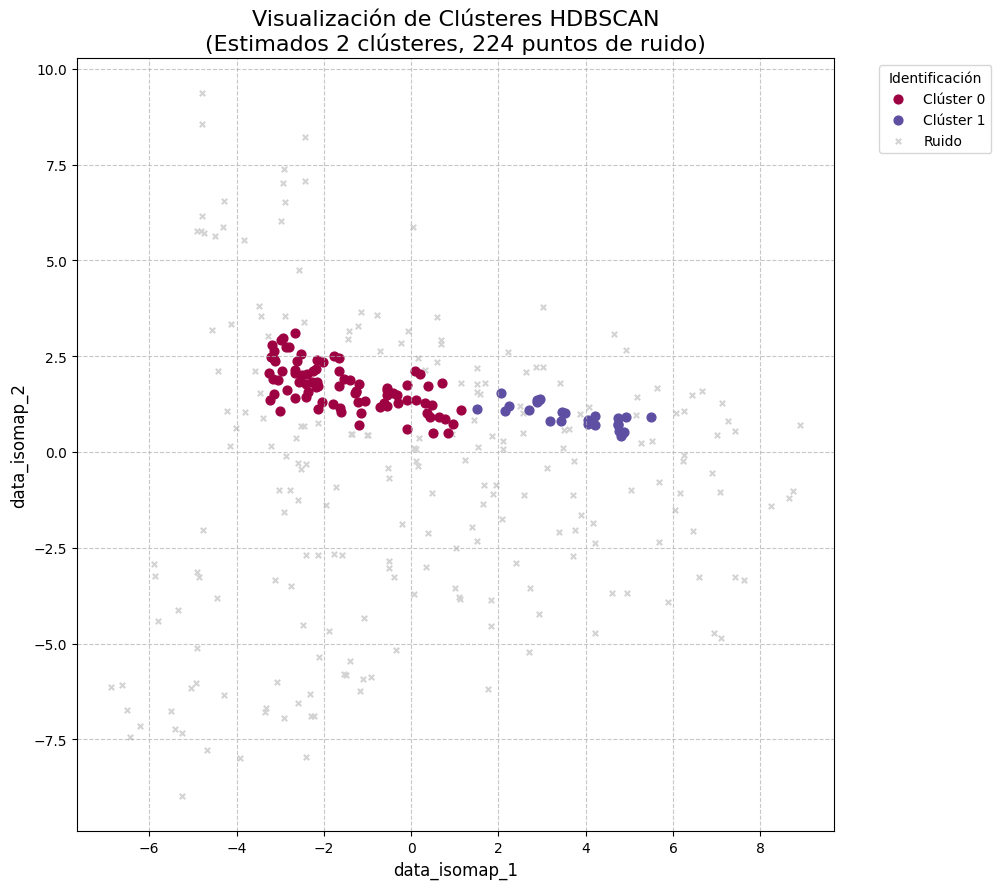

Proceso de graficación completado. Etiquetas únicas: [-1, 0, 1]
Número de clústeres (sin ruido): 2
Puntos por clúster (incluyendo -1 para ruido): {-1: 224, 0: 83, 1: 26}


In [73]:
# 3. Preparar la gráfica
plt.figure(figsize=(12, 9))
plt.clf() # Limpiar figura por si acaso

# 4. Definir colores
# Usar un colormap para obtener colores distintos para los clústeres
if n_clusters_ > 0:
    num_colors_for_map = max(2, n_clusters_)
    cluster_palette = plt.cm.get_cmap('Spectral', num_colors_for_map)
else:
    cluster_palette = plt.cm.get_cmap('Spectral', 2) # Fallback si no hay clústeres

# Mapeo de etiquetas de clúster a índices de color (para clústeres no ruidosos)
cluster_label_to_color_idx = {label: i for i, label in enumerate(unique_labels[unique_labels != -1])}

# 5. Graficar cada clúster y el ruido
plot_labels_used = set() # Para controlar las etiquetas en la leyenda

for k_label in unique_labels:
    members_mask = (labels == k_label)
    # Asegurarse de que df_hbscan tenga suficientes columnas antes de intentar acceder a .iloc[:, :2]
    if df_hbscan.shape[1] >= 2:
        xy = df_hbscan[members_mask].iloc[:, :2]
    elif df_hbscan.shape[1] == 1: # Si solo hay una dimensión, usarla para x y 0 para y
        xy_data = df_hbscan[members_mask].iloc[:, 0]
        xy = pd.DataFrame({'x': xy_data, 'y': np.zeros_like(xy_data)})
    else: # No hay datos para graficar
        continue


    if k_label == -1:
        # Graficar puntos de ruido
        plt.scatter(xy.iloc[:, 0], xy.iloc[:, 1],
                    s=15,
                    color='lightgrey',
                    marker='x',
                    label='Ruido' if 'Ruido' not in plot_labels_used else "")
        if 'Ruido' not in plot_labels_used: plot_labels_used.add('Ruido')
    else:
        # Graficar puntos del clúster
        cluster_color_idx = cluster_label_to_color_idx.get(k_label, 0) # .get con fallback por si acaso
        current_label_text = f'Clúster {k_label}'
        # Normalizar índice para colormap de forma segura
        if n_clusters_ > 1 :
            color_val = cluster_palette(cluster_color_idx / (n_clusters_ -1))
        elif n_clusters_ == 1: # Si solo hay un clúster
             color_val = cluster_palette(0.5) # Usar un color del medio del mapa
        else: # No hay clústeres (solo ruido)
            color_val = 'blue' # Color por defecto si no hay clústeres (no debería llegar aquí si k_label != -1)

        plt.scatter(xy.iloc[:, 0], xy.iloc[:, 1],
                    s=40,
                    color=color_val,
                    marker='o',
                    label=current_label_text if current_label_text not in plot_labels_used else "")
        if current_label_text not in plot_labels_used: plot_labels_used.add(current_label_text)


# 6. Añadir título y etiquetas
plt.title(f"Visualización de Clústeres HDBSCAN\n(Estimados {n_clusters_} clústeres, {np.sum(labels == -1)} puntos de ruido)", fontsize=16)

col_names = df_hbscan.columns
x_label = str(col_names[0]) if len(col_names) > 0 else "Dimensión 1"
y_label = str(col_names[1]) if len(col_names) > 1 else "Dimensión 2 (o 0 si es 1D)"

plt.xlabel(x_label, fontsize=12)
plt.ylabel(y_label, fontsize=12)

handles, legend_labels_list = plt.gca().get_legend_handles_labels()
if handles:
    noise_idx = -1
    try:
        noise_idx = legend_labels_list.index('Ruido')
    except ValueError:
        pass

    if noise_idx != -1:
        handles.append(handles.pop(noise_idx))
        legend_labels_list.append(legend_labels_list.pop(noise_idx))

    plt.legend(handles, legend_labels_list, title="Identificación", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout(rect=[0, 0, 0.85, 1])
plt.show()

print(f"Proceso de graficación completado. Etiquetas únicas: {unique_labels.tolist()}")
print(f"Número de clústeres (sin ruido): {n_clusters_}")
print(f"Puntos por clúster (incluyendo -1 para ruido): {pd.Series(labels).value_counts().to_dict()}")

In [74]:
resultados = calcular_metricas_clustering(df_hbscan, ['HBScan_Cluster'])

# Mostrar resultados
for col, metricas in resultados.items():
    print(f"{col} -> Silhouette Score: {metricas['Silhouette Score']}, "
          f"Calinski-Harabasz: {metricas['Calinski-Harabasz']}, "
          f"Davies-Bouldin: {metricas['Davies-Bouldin']}")

HBScan_Cluster -> Silhouette Score: -0.043197868475113144, Calinski-Harabasz: 23.319196462275656, Davies-Bouldin: 1.8733470145518076


## MeanShift

In [75]:
df_meanshift = df_isomap.iloc[:, :2]
# df_meanshift = df_embeddings.iloc[:, :2]

In [76]:
bandwidth = estimate_bandwidth(df_meanshift, quantile=0.2, n_samples=500)

In [77]:
# ms = MeanShift(bandwidth=2, bin_seeding=True)
# ms = MeanShift(bandwidth=2)
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True) # === ms = MeanShift() === ms = MeanShift(bin_seeding=True)
ms.fit(df_meanshift)
labels = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

print("number of estimated clusters : %d" % n_clusters_)

number of estimated clusters : 2


In [78]:
df_meanshift['MeanShift_Cluster'] = labels
scaledNonBinaryVariables['MeanShift_Cluster']=labels
data_reduce['MeanShift_Cluster']=labels

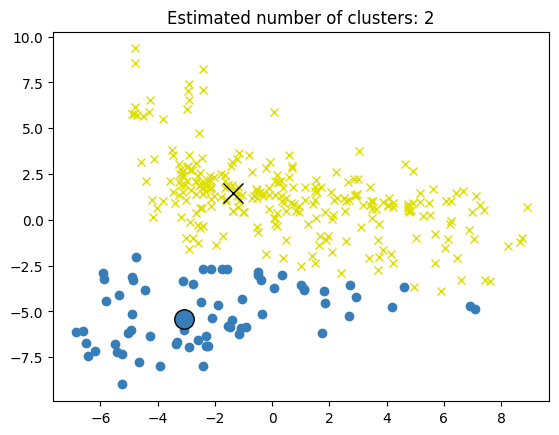

In [79]:
plt.figure(1)
plt.clf()

colors = ["#dede00", "#377eb8", "#f781bf"]
markers = ["x", "o", "^"]

for k, col in zip(range(n_clusters_), colors):
    my_members = labels == k
    cluster_center = cluster_centers[k]
    plt.plot(df_meanshift[my_members].iloc[:, 0], df_meanshift[my_members].iloc[:, 1], markers[k], color=col)
    plt.plot(
        cluster_center[0],
        cluster_center[1],
        markers[k],
        markerfacecolor=col,
        markeredgecolor="k",
        markersize=14,
    )
plt.title("Estimated number of clusters: %d" % n_clusters_)
plt.show()

In [80]:
resultados = calcular_metricas_clustering(df_meanshift, ['MeanShift_Cluster'])

# Mostrar resultados
for col, metricas in resultados.items():
    print(f"{col} -> Silhouette Score: {metricas['Silhouette Score']}, "
          f"Calinski-Harabasz: {metricas['Calinski-Harabasz']}, "
          f"Davies-Bouldin: {metricas['Davies-Bouldin']}")

MeanShift_Cluster -> Silhouette Score: 0.4172253141682898, Calinski-Harabasz: 166.01556999716294, Davies-Bouldin: 0.9594910816224371


## Review

In [81]:
columns = ['Clusters_2PCAK_Means', 'Clusters_3PCAK_Means', 't-SNEKMeans', 'MDS_Cluster', 'Isomap_Cluster', 'HBScan_Cluster', 'MeanShift_Cluster']
items = [
    ['X_pca_2d_1', 'X_pca_2d_2'], 
    ['X_pca_3d_1', 'X_pca_3d_2', 'X_pca_3d_3'], 
    ['tsne_result_1', 'tsne_result_2'], 
    ['data_mds_1', 'data_mds_2'],
    ['data_isomap_1', 'data_isomap_2'],
    ['data_isomap_1', 'data_isomap_2'],
    ['data_isomap_1', 'data_isomap_2']
]

for i in range(len(columns)):
    resultados = calcular_metricas_clustering(data_reduce[items[i] + [columns[i]]], [columns[i]])

    # Mostrar resultados
    for col, metricas in resultados.items():
        print(f"{col} -> Silhouette Score: {metricas['Silhouette Score']}, "
            f"Calinski-Harabasz: {metricas['Calinski-Harabasz']}, "
            f"Davies-Bouldin: {metricas['Davies-Bouldin']}") 
    

Clusters_2PCAK_Means -> Silhouette Score: 0.3530207125418302, Calinski-Harabasz: 197.2563470515554, Davies-Bouldin: 1.1743454822274855
Clusters_3PCAK_Means -> Silhouette Score: 0.26468064830675997, Calinski-Harabasz: 118.65943338089454, Davies-Bouldin: 1.5349207975304657
t-SNEKMeans -> Silhouette Score: 0.3925775156231306, Calinski-Harabasz: 282.8980851759508, Davies-Bouldin: 0.9971455655856694
MDS_Cluster -> Silhouette Score: 0.3486602191162042, Calinski-Harabasz: 193.20558513608958, Davies-Bouldin: 1.2013731995911334
Isomap_Cluster -> Silhouette Score: 0.4083793246201943, Calinski-Harabasz: 169.97875192707963, Davies-Bouldin: 0.9342637582268911
HBScan_Cluster -> Silhouette Score: -0.043197868475113144, Calinski-Harabasz: 23.319196462275656, Davies-Bouldin: 1.8733470145518076
MeanShift_Cluster -> Silhouette Score: 0.4172253141682898, Calinski-Harabasz: 166.01556999716294, Davies-Bouldin: 0.9594910816224371
